In [1]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

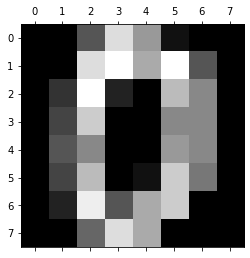

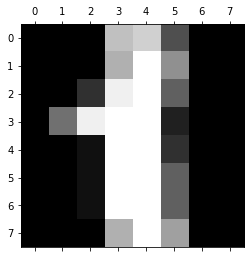

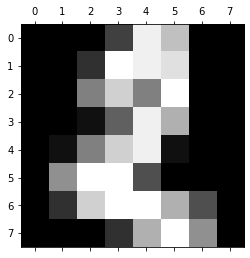

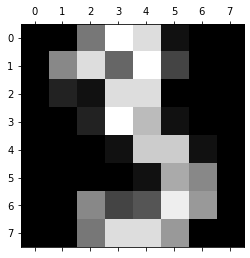

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [4]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [5]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [6]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [7]:
from sklearn.model_selection import train_test_split

X = df.drop(['target'], axis='columns')
y =  digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [8]:
print(len(X))
print(len(X_train))
print(len(X_test))

1797
1437
360


<h4>ensemble : 많은 알고리즘을 사용할 때 필요함</h4>

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

In [10]:
model.score(X_test, y_test)

0.975

<h3>Tune Parameters</h3>

<h4>1. n_estimators</h4>

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=10)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.95

In [12]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=20)

model.fit(X_train, y_train)

model.score(X_test, y_test)

0.9555555555555556

<h5>
- n_estimators : integer, optional (default=10)
The number of trees in the forest.
</h5>
<h5>
- bootstrap : boolean, optional (default=True)
Whether bootstrap samples are used when building trees.
  True 베깅
  False 페이스팅
</h5>
<h5>
- criterion : string, optional (default=”mse”)
The function to measure the quality of a split. Supported criteria are “mse” for the mean squared error, which is equal to variance reduction as feature selection criterion, and “mae” for the mean absolute error.
New in version 0.18: Mean Absolute Error (MAE) criterion.
  'mse' (평균제곱오차)
  'friedman_mse'
  'mae'
</h5>

<h5>
- max_features
<ul>
  <li>분류 : max_features = sqrt(n_features)</li>
  <li>회귀 : max_features = n_features</li>
</ul>
<h5>

<h3>Confusion matrix</h3>

In [13]:
y_predicted = model.predict(X_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted) # truth, predict 순
cm


array([[26,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1, 41,  0,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 38,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 31,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 40,  0,  0],
       [ 1,  3,  0,  0,  0,  0,  0,  2, 21,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  3, 37]], dtype=int64)

Text(159.0, 0.5, 'y_predicted')

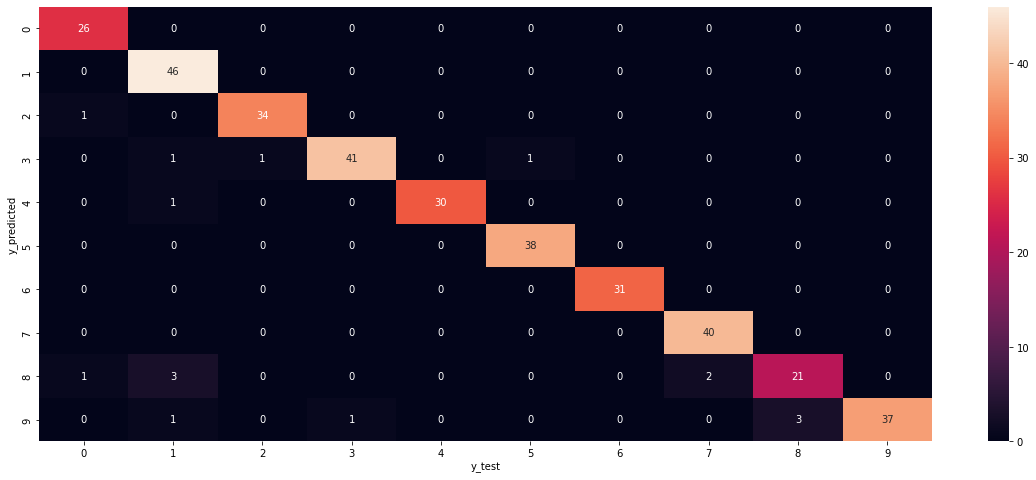

In [14]:
import seaborn as sn
plt.figure(figsize=(20,8))
sn.heatmap(cm, annot= True)
plt.xlabel('y_test')
plt.ylabel('y_predicted')


<h2>[ 참고 ]</h2>

<h3>Ensemble</h3>
<h4>1. Ensemble</h4>
<h5>
<ul>
    <li>일련의 예측기(분류, 회귀 모델)로부터 예측을 수집하여 가장 좋은 모델 하나보다 더 좋은 예측을 얻을 수 있는 일련의 예측기 또는 학습 방법론</li>
    <li>Feature Engineering을 사용할 수 없거나 Feature에 대한 정보가 없는 경우에 사용</li>
    <li></li>
</ul>
</h5>

<h4>2. Ensemble 기법</h4>
<h5>
<ul>
    <li>Voting (투표) - 투표를 통해 결과 도출</li>
    <li>Bagging - Bootstrap Aggregating (샘플을 다양하게 중복 생성)</li>
    <li>Boosting - 이전 오차를 보완하며 가중치 부여</li>
    <li>Stacking- 여러 모델을 기반으로 meta 모델</li>
</ul>
</h5>